In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
import math
from scipy.stats import ks_2samp
import researchpy as rp
import scipy.stats as stats

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\liana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
sid = SentimentIntensityAnalyzer()

In [3]:
a = 'This was a good movie.'
output = sid.polarity_scores(a)
print(output)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}


# Get Scores for All Data

In [4]:
df = pd.read_csv('../character_tweets_english.csv')
df

,Unnamed: 0,tweet_id,author_id,date,text,lang,name_searched
0,0,461259797468573697,2432293886,2014-04-29T21:44:40.000Z,"Beyond the army blanket, the Finn waited at th...",en,Finn
1,1,461252098953576448,14482363,2014-04-29T21:14:04.000Z,"♫ Just Announced: Austin, TX - Jul 18 at Black...",en,Finn
2,2,461233685052653568,127956375,2014-04-29T20:00:54.000Z,Finn's Reversible Bandana With Plastic Bag Poc...,en,Finn
3,5,461146329264046081,604765876,2014-04-29T14:13:47.000Z,"Finn 2, a long haired black cheese boy, and Br...",en,Finn
4,6,461141522730459138,12373992,2014-04-29T13:54:41.000Z,@Finn_Mackay @fusillisara being a woman may no...,en,Finn
...,...,...,...,...,...,...,...
8157,10,723891204312698881,624705452,2016-04-23T15:08:07.000Z,"""Tell me you will never send me away ever agai...",en,Clara Oswald
8158,11,723848430057975808,383578435,2016-04-23T12:18:08.000Z,Ill be asleep when they announce the new compa...,en,Clara Oswald
8159,12,723688465565503488,1242317940,2016-04-23T01:42:30.000Z,Something along the why is my sit stand desk w...,en,Clara Oswald
8160,2,723965636678967296,287677341,2016-04-23T20:03:53.000Z,no one will replace my true love clara oswald ...,en,Clara Oswald


In [5]:
df['scores'] = df['text'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >0 else ('neg' if c < 0 else 'neu'))

df

,Unnamed: 0,tweet_id,author_id,date,text,lang,name_searched,scores,compound,comp_score
0,0,461259797468573697,2432293886,2014-04-29T21:44:40.000Z,"Beyond the army blanket, the Finn waited at th...",en,Finn,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
1,1,461252098953576448,14482363,2014-04-29T21:14:04.000Z,"♫ Just Announced: Austin, TX - Jul 18 at Black...",en,Finn,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.4995,pos
2,2,461233685052653568,127956375,2014-04-29T20:00:54.000Z,Finn's Reversible Bandana With Plastic Bag Poc...,en,Finn,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
3,5,461146329264046081,604765876,2014-04-29T14:13:47.000Z,"Finn 2, a long haired black cheese boy, and Br...",en,Finn,"{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'comp...",0.3612,pos
4,6,461141522730459138,12373992,2014-04-29T13:54:41.000Z,@Finn_Mackay @fusillisara being a woman may no...,en,Finn,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.5719,pos
...,...,...,...,...,...,...,...,...,...,...
8157,10,723891204312698881,624705452,2016-04-23T15:08:07.000Z,"""Tell me you will never send me away ever agai...",en,Clara Oswald,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
8158,11,723848430057975808,383578435,2016-04-23T12:18:08.000Z,Ill be asleep when they announce the new compa...,en,Clara Oswald,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",-0.6808,neg
8159,12,723688465565503488,1242317940,2016-04-23T01:42:30.000Z,Something along the why is my sit stand desk w...,en,Clara Oswald,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
8160,2,723965636678967296,287677341,2016-04-23T20:03:53.000Z,no one will replace my true love clara oswald ...,en,Clara Oswald,"{'neg': 0.121, 'neu': 0.495, 'pos': 0.385, 'co...",0.7003,pos


In [6]:
df['comp_score'].value_counts()

pos    2915
neg    2907
neu    2340
Name: comp_score, dtype: int64

# Get Scores for All Data (Clean)

In [7]:
df_clean = pd.read_csv('../clean_tweets.csv')
df_clean

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,author_id,date,text,lang,name_searched,text_lower
0,0,185,2,461094439612452864,2249674261,2014-04-29T10:47:35.000Z,@SamuelAlexandcr [A small smile spread across ...,en,Finn,@samuelalexandcr [a small smile spread across ...
1,1,186,0,461280295811940352,175579793,2014-04-29T23:06:07.000Z,keen for John Boyega as the token black guy in...,en,John Boyega,keen for john boyega as the token black guy in...
2,2,187,1,461280142732832768,471986624,2014-04-29T23:05:30.000Z,"RT @km_mcfarland: Congrats to John Boyega, Dai...",en,John Boyega,"rt @km_mcfarland: congrats to john boyega, dai..."
3,3,188,2,461272236045770752,502208875,2014-04-29T22:34:05.000Z,@MarySueRenfrow Does putting John Boyega in th...,en,John Boyega,@marysuerenfrow does putting john boyega in th...
4,4,191,5,461257594926288897,733873640,2014-04-29T21:35:55.000Z,John Boyega is set to be in the new Starwars m...,en,John Boyega,john boyega is set to be in the new starwars m...
...,...,...,...,...,...,...,...,...,...,...
4302,4540,8158,11,723848430057975808,383578435,2016-04-23T12:18:08.000Z,Ill be asleep when they announce the new compa...,en,Clara Oswald,ill be asleep when they announce the new compa...
4303,4541,8159,12,723688465565503488,1242317940,2016-04-23T01:42:30.000Z,Something along the why is my sit stand desk w...,en,Clara Oswald,something along the why is my sit stand desk w...
4304,4542,8160,2,723965636678967296,287677341,2016-04-23T20:03:53.000Z,no one will replace my true love clara oswald ...,en,Clara Oswald,no one will replace my true love clara oswald ...
4305,4543,8161,11,723921141941850117,464288496,2016-04-23T17:07:04.000Z,"Forget the new companion, no one can beat rose...",en,Clara Oswald,"forget the new companion, no one can beat rose..."


In [8]:
df_clean['scores'] = df_clean['text'].apply(lambda review: sid.polarity_scores(review))
df_clean['compound']  = df_clean['scores'].apply(lambda score_dict: score_dict['compound'])
df_clean['comp_score'] = df_clean['compound'].apply(lambda c: 'pos' if c >0 else ('neg' if c < 0 else 'neu'))

df_clean

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,author_id,date,text,lang,name_searched,text_lower,scores,compound,comp_score
0,0,185,2,461094439612452864,2249674261,2014-04-29T10:47:35.000Z,@SamuelAlexandcr [A small smile spread across ...,en,Finn,@samuelalexandcr [a small smile spread across ...,"{'neg': 0.136, 'neu': 0.72, 'pos': 0.144, 'com...",-0.2023,neg
1,1,186,0,461280295811940352,175579793,2014-04-29T23:06:07.000Z,keen for John Boyega as the token black guy in...,en,John Boyega,keen for john boyega as the token black guy in...,"{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.6124,pos
2,2,187,1,461280142732832768,471986624,2014-04-29T23:05:30.000Z,"RT @km_mcfarland: Congrats to John Boyega, Dai...",en,John Boyega,"rt @km_mcfarland: congrats to john boyega, dai...","{'neg': 0.107, 'neu': 0.684, 'pos': 0.209, 'co...",0.5319,pos
3,3,188,2,461272236045770752,502208875,2014-04-29T22:34:05.000Z,@MarySueRenfrow Does putting John Boyega in th...,en,John Boyega,@marysuerenfrow does putting john boyega in th...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4,4,191,5,461257594926288897,733873640,2014-04-29T21:35:55.000Z,John Boyega is set to be in the new Starwars m...,en,John Boyega,john boyega is set to be in the new starwars m...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...",-0.3595,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,4540,8158,11,723848430057975808,383578435,2016-04-23T12:18:08.000Z,Ill be asleep when they announce the new compa...,en,Clara Oswald,ill be asleep when they announce the new compa...,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",-0.6808,neg
4303,4541,8159,12,723688465565503488,1242317940,2016-04-23T01:42:30.000Z,Something along the why is my sit stand desk w...,en,Clara Oswald,something along the why is my sit stand desk w...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4304,4542,8160,2,723965636678967296,287677341,2016-04-23T20:03:53.000Z,no one will replace my true love clara oswald ...,en,Clara Oswald,no one will replace my true love clara oswald ...,"{'neg': 0.121, 'neu': 0.495, 'pos': 0.385, 'co...",0.7003,pos
4305,4543,8161,11,723921141941850117,464288496,2016-04-23T17:07:04.000Z,"Forget the new companion, no one can beat rose...",en,Clara Oswald,"forget the new companion, no one can beat rose...","{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",-0.4767,neg


In [9]:
df_clean['comp_score'].value_counts()

pos    1728
neg    1570
neu    1009
Name: comp_score, dtype: int64

# Separate Black and White Characters

In [10]:
white_character_list = ['Kylo Ren', 'Adam Driver', 'Rey', 'Daisy Ridley', 
                  'Ichabod Crane', 'Tom Mison',
                  'Caitlin Snow', 'Danielle Panabaker',
                  'Daniel Craig', 'Pierce Brosnan',
                  'Spider Man', 'Peter Parker', 'Tom Holland',
                  'Angelina Jolie', 'Maleficent', 'Emma Watson', 'Cate Clanchett', 'Cinderella',
                  'Jeremy Renner', 'Hawkeye', 'Mark Rufallo', 'Bruce Banner',
                  'Margot Robbie', 'Harley Quinn', 'Mary Elizabeth Winstead', 'The Huntress',
                  'Les Mis',
                  'Jared Leto', 'Joker', 
                  'Natlie Portman', 'Jane Foster',
                  'Scarlett Johannson', 'Black Widow',
                  'Arthur', 'Bradley James',
                  'Negasonic Teenage Warhead', 'Brianna Hildebrand',
                  'Judi Dench', 'M', 'Vesper Lynd', 'Madeleine Swann', 'Eva Green', 'Léa Seydoux',
                  'Bucky Barnes', 'Sebastian Stan',
                  'Teagan Croft', 'Raven',
                  'Jenna Coleman', 'Clara Oswald'
                  ]

In [11]:
drop_list = ['007', 'James Bond']

In [12]:
df_black_characters = df_clean.copy()
df_white_characters = df_clean.copy()

In [13]:
for index, row in df_clean.iterrows():
    name_searched = row['name_searched']
    if name_searched in white_character_list:
        df_black_characters.drop(index, inplace=True)
    elif name_searched in drop_list:
        df_white_characters.drop(index, inplace=True)
        df_black_characters.drop(index, inplace=True)
    else:
        df_white_characters.drop(index, inplace=True)

In [14]:
df_black_characters

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,author_id,date,text,lang,name_searched,text_lower,scores,compound,comp_score
0,0,185,2,461094439612452864,2249674261,2014-04-29T10:47:35.000Z,@SamuelAlexandcr [A small smile spread across ...,en,Finn,@samuelalexandcr [a small smile spread across ...,"{'neg': 0.136, 'neu': 0.72, 'pos': 0.144, 'com...",-0.2023,neg
1,1,186,0,461280295811940352,175579793,2014-04-29T23:06:07.000Z,keen for John Boyega as the token black guy in...,en,John Boyega,keen for john boyega as the token black guy in...,"{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.6124,pos
2,2,187,1,461280142732832768,471986624,2014-04-29T23:05:30.000Z,"RT @km_mcfarland: Congrats to John Boyega, Dai...",en,John Boyega,"rt @km_mcfarland: congrats to john boyega, dai...","{'neg': 0.107, 'neu': 0.684, 'pos': 0.209, 'co...",0.5319,pos
3,3,188,2,461272236045770752,502208875,2014-04-29T22:34:05.000Z,@MarySueRenfrow Does putting John Boyega in th...,en,John Boyega,@marysuerenfrow does putting john boyega in th...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4,4,191,5,461257594926288897,733873640,2014-04-29T21:35:55.000Z,John Boyega is set to be in the new Starwars m...,en,John Boyega,john boyega is set to be in the new starwars m...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...",-0.3595,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,4505,8121,57,723923347394809864,234165857,2016-04-23T17:15:50.000Z,I'm glad they did this because there's no good...,en,Pearl Mackie,i'm glad they did this because there's no good...,"{'neg': 0.09, 'neu': 0.656, 'pos': 0.254, 'com...",0.6114,pos
4268,4506,8122,58,723923272514035713,2791622188,2016-04-23T17:15:32.000Z,No dis respect but Pearl Mackie is no Jenna Lo...,en,Pearl Mackie,no dis respect but pearl mackie is no jenna lo...,"{'neg': 0.285, 'neu': 0.634, 'pos': 0.081, 'co...",-0.6310,neg
4269,4507,8123,60,723923121829453824,2949674331,2016-04-23T17:14:56.000Z,@bbcdoctorwho @DoctorWho_FR_ @DoctorWhoThing W...,en,Pearl Mackie,@bbcdoctorwho @doctorwho_fr_ @doctorwhothing w...,"{'neg': 0.075, 'neu': 0.61, 'pos': 0.315, 'com...",0.6249,pos
4270,4508,8124,62,723922952518000641,25679689,2016-04-23T17:14:16.000Z,No to Pearl Mackie. We don't need another dumb...,en,Pearl Mackie,no to pearl mackie. we don't need another dumb...,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...",-0.5423,neg


In [15]:
df_white_characters

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,author_id,date,text,lang,name_searched,text_lower,scores,compound,comp_score
194,206,532,0,461274856261046272,259036230,2014-04-29T22:44:30.000Z,Adam Driver is playing Lando. It's all part of...,en,Adam Driver,adam driver is playing lando. it's all part of...,"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.2023,pos
195,207,533,2,461200225131327488,273716478,2014-04-29T17:47:57.000Z,"RT @megsokay: Okay, I'll be the person who poi...",en,Adam Driver,"rt @megsokay: okay, i'll be the person who poi...","{'neg': 0.207, 'neu': 0.634, 'pos': 0.159, 'co...",-0.4019,neg
196,208,534,3,461200008470335490,1341886778,2014-04-29T17:47:05.000Z,'Star Wars: Episode VII' Cast Includes Harriso...,en,Adam Driver,'star wars: episode vii' cast includes harriso...,"{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'comp...",-0.5574,neg
197,209,540,9,461198275228762112,55846083,2014-04-29T17:40:12.000Z,"Okay, I'll be the person who points out that s...",en,Adam Driver,"okay, i'll be the person who points out that s...","{'neg': 0.207, 'neu': 0.634, 'pos': 0.159, 'co...",-0.4019,neg
198,210,541,10,461188773196226560,14789070,2014-04-29T17:02:26.000Z,@jason_wilson Boyega is the black guy and he i...,en,Adam Driver,@jason_wilson boyega is the black guy and he i...,"{'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou...",-0.7184,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,4540,8158,11,723848430057975808,383578435,2016-04-23T12:18:08.000Z,Ill be asleep when they announce the new compa...,en,Clara Oswald,ill be asleep when they announce the new compa...,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",-0.6808,neg
4303,4541,8159,12,723688465565503488,1242317940,2016-04-23T01:42:30.000Z,Something along the why is my sit stand desk w...,en,Clara Oswald,something along the why is my sit stand desk w...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
4304,4542,8160,2,723965636678967296,287677341,2016-04-23T20:03:53.000Z,no one will replace my true love clara oswald ...,en,Clara Oswald,no one will replace my true love clara oswald ...,"{'neg': 0.121, 'neu': 0.495, 'pos': 0.385, 'co...",0.7003,pos
4305,4543,8161,11,723921141941850117,464288496,2016-04-23T17:07:04.000Z,"Forget the new companion, no one can beat rose...",en,Clara Oswald,"forget the new companion, no one can beat rose...","{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",-0.4767,neg


In [16]:
black_character_counts = df_black_characters['comp_score'].value_counts()
black_character_counts

pos    609
neg    557
neu    421
Name: comp_score, dtype: int64

In [17]:
black_characters_stats = df_black_characters.describe()
black_characters_stats = black_characters_stats[['compound']]
black_characters_stats

,compound
count,1587.000000
mean,0.031877
std,0.459928
min,-0.951900
25%,-0.296000
50%,0.000000
75%,0.401900
max,0.977900


In [18]:
df_white_characters['comp_score'].value_counts()

pos    1026
neg     937
neu     540
Name: comp_score, dtype: int64

In [19]:
white_characters_stats = df_white_characters.describe()
white_characters_stats = white_characters_stats[['compound']]
white_characters_stats

,compound
count,2503.000000
mean,0.032762
std,0.467203
min,-0.973500
25%,-0.339100
50%,0.000000
75%,0.421500
max,0.972900


# Compare Sentiment in Black Characters

Understanding the results: https://community.alteryx.com/t5/Alteryx-Designer-Discussions/In-the-Logistic-Regression-Report-Factor-Missing/td-p/10094

Code reference: https://stats.stackexchange.com/questions/336683/statistical-test-for-differences-in-counts-between-groups

In [20]:
black_character_counts = black_character_counts.rename_axis('label').reset_index(name='counts')
black_character_counts

,label,counts
0,pos,609
1,neg,557
2,neu,421


In [21]:
label = black_character_counts['label'].to_numpy()
counts = black_character_counts['counts'].to_numpy()
print(label)
print(counts)

['pos' 'neg' 'neu']
[609 557 421]


GLM Results when the positive label is used as the intercept.

![title](glm_pos_intercept.PNG)

GLM Results when the negative label is used as the intercept.

![title](glm_neg_intercept.PNG)

GLM Results when the neutral label is used as the intercept.

![title](glm_neu_intercept.PNG)

#### Neutral is statistically significant from Negative in terms of number of posts
#### Neutral is statistically significant from Positive in terms of number of posts
#### However, Positive is not statisically significant from Negative

# Compare Across Black and White Characters

## Compute Z-Statistic

![title](z_statistic_equation.png)

In [22]:
x1 = black_characters_stats.at['mean', 'compound']
print(x1)

0.031877315689981096


In [23]:
x2 = white_characters_stats.at['mean', 'compound']
print(x2)

0.032762045545345585


In [24]:
numerator = x1 - x2

In [25]:
std1 = black_characters_stats.at['std', 'compound']
print(std1)

0.4599284334806204


In [26]:
std2 = white_characters_stats.at['std', 'compound']
print(std2)

0.467203077054896


In [27]:
std1_squared = std1 ** 2
std2_squared = std2 ** 2

In [28]:
denominator = std1_squared + std2_squared

In [29]:
denominator = math.sqrt(denominator)

In [30]:
z = numerator / denominator
print(z)

-0.0013494940388431396


#### z = -0.0013494940388431396 < 2 
#### therefore there is no significant difference between the sentiment for Black and White characters

## Histogram

In [31]:
black_character_compound = df_black_characters[['compound']]
black_character_compound.columns = ['Black Characters']
black_character_compound

,Black Characters
0,-0.2023
1,0.6124
2,0.5319
3,0.0000
4,-0.3595
...,...
4267,0.6114
4268,-0.6310
4269,0.6249
4270,-0.5423


In [32]:
white_character_compound = df_white_characters[['compound']]
white_character_compound.columns = ['White Characters']
white_character_compound

,White Characters
194,0.2023
195,-0.4019
196,-0.5574
197,-0.4019
198,-0.7184
...,...
4302,-0.6808
4303,0.0000
4304,0.7003
4305,-0.4767


<AxesSubplot:xlabel='Compound Sentiment Score', ylabel='Frequency'>

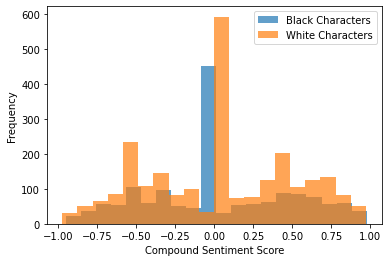

In [33]:
ax = black_character_compound.plot.hist(bins=20, alpha=0.7)
ax.set_xlabel('Compound Sentiment Score')
white_character_compound.plot.hist(bins=20, alpha=0.7, ax=ax)

## Two-sample Kolmogorov-Smirnov Test

In [34]:
black_character_compund_list = black_character_compound['Black Characters'].to_list()
white_character_compund_list = white_character_compound['White Characters'].to_list()

In [35]:
ks_2samp(black_character_compund_list, white_character_compund_list)

Ks_2sampResult(statistic=0.0334831976045884, pvalue=0.22240966478345026)

#### alpha = 0.05
#### p-value = 0.22240966478345026
#### p-value > alpha therefore there is no significant difference between the sentiment for Black and White characters